# Import

In [1]:
import pandas as pd 
import re #expression régulière 
import nltk #traitement naturel symbolique et statistique du langage anglais
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import ast 


nltk.download('stopwords')
nltk.download('wordnet')


df = pd.read_excel("data.xlsx")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head()

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description
0,17167919,2017-04-25,3264223,2018-01-03,"['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G0...","['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...","<!-- EPO <DP n=""18""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."
1,17166775,2017-04-18,3235458,2017-10-25,"['A61B17-68', 'A61B17-888', 'A61B17-8685', 'A6...","['A61B17-88', 'A61B17-68', 'A61B17-86']","<!-- EPO <DP n=""20""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">FIE..."
2,17166069,2017-04-11,3249094,2017-11-29,"['D06F58-206', 'D06F58-20']","['D06F58-20', 'D06F58-02']","<!-- EPO <DP n=""22""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
3,18771363,2018-03-05,3605724,2020-02-05,"['H01P1-2138', 'H01P5-107', 'H01P1-2088', 'H01...","['H01P3-12', 'H01P1-213', 'H01P5-107']","<!-- EPO <DP n=""62""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">Tec..."
4,19881950,2019-11-01,3713245,2020-09-23,"['H04N21-4345', 'H04N21-4821', 'H04N21-4316']","['H04N21-482', 'H04N21-262']","<!-- EPO <DP n=""14""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."


In [3]:
df.columns
df.dtypes #Normalement pas besoin de faire des conversions 

Numéro d'application              int64
Date d'application       datetime64[ns]
Numero de publication             int64
date de publication      datetime64[ns]
CPC                              object
IPC                              object
claim                            object
description                      object
dtype: object

In [4]:
#Des valeurs manquantes ?
print(df.isnull().sum())

#Pas de valeur manquante 

Numéro d'application     0
Date d'application       0
Numero de publication    0
date de publication      0
CPC                      0
IPC                      0
claim                    0
description              0
dtype: int64


In [5]:
#Supprimer les doublons 
df = df.drop_duplicates()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum()) #pas de doublons

Nombre de doublons : 0


In [6]:
df_sample = df.sample(n=10000, random_state=1)
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description
26247,18898200,2018-11-12,3736539,2020-11-11,"['B62D6-10', 'G01L5-221', 'B62D15-0215', 'G01L...","['B62D15-02', 'G01D11-24', 'B62D6-10', 'G01D5-...","<!-- EPO <DP n=""42""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">[Te..."
35067,19190680,2019-08-08,3609084,2020-02-12,"['H04B1-04', 'H04B1-44']","['H04B1-04', 'H03K17-56', 'H03K17-74', 'H04B1-...","<!-- EPO <DP n=""23""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
34590,20867753,2020-08-18,4033630,2022-07-27,"['H02M1-0064', 'B60L1-006', 'H02P25-22', 'H02P...","['H02J7-00', 'H02P27-06', 'B60R16-03']","<!-- EPO <DP n=""69""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
16668,19206926,2019-11-04,3817319,2021-05-05,"['H04L69-14', 'Y02D30-50', 'Y02D30-70']",['H04L29-06'],"<!-- EPO <DP n=""16""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."
12196,20197989,2020-09-24,3892927,2021-10-13,"['F24F1-0007', 'F24F7-04', 'F24F8-10', 'F24F1-...","['F24F1-0007', 'F24F7-04', 'F24F8-10', 'F24F1-...","<!-- EPO <DP n=""16""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
...,...,...,...,...,...,...,...,...
49858,21150277,2021-01-05,3845402,2021-07-07,"['B60H1-00278', 'B60H1-00342', 'B60H1-00392', ...","['B60H1-00', 'B60H1-32', 'B60H1-22']","<!-- EPO <DP n=""13""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
19849,19213798,2019-12-05,3662857,2020-06-10,"['A61B34-20', 'G01B7-004', 'A61B34-35', 'A61B3...","['A61B5-06', 'A61B34-20', 'G01B7-004', 'A61B34...","<!-- EPO <DP n=""26""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
46899,20305681,2020-06-22,3929694,2021-12-29,"['G05F1-468', 'G05F1-575', 'G05F3-30', 'G05F3-...","['G05F1-46', 'G05F1-575', 'G05F3-22', 'G05F3-3...","<!-- EPO <DP n=""23""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
28256,21152693,2021-01-21,4032900,2022-07-27,"['C12Y114-13', 'C12Y113-11', 'C12Y102-01067', ...","['C12N9-02', 'C12P7-22', 'C07K14-37', 'C12N15-...","<!-- EPO <DP n=""88""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."


# Tokenisation et lemmatisation

In [7]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Enlever les caractères spéciaux
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\s+', ' ', text)  # Enlever les espaces multiples
    return text

df_sample['claim_clean'] = df_sample['claim'].apply(clean_text)


lemmatizer = WordNetLemmatizer() #réduit les mots, ex: running -> run
stop_words = set(stopwords.words('english')) #supp les mots inutiles comme "the" "and"

def preprocess_text(text):
    words = text.split()  # Tokenisation
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatisation et suppression des stopwords
    return ' '.join(words) #puis reconstitue en une phrase 

df_sample['claim_processed'] = df_sample['claim_clean'].apply(preprocess_text)

print(df_sample[['claim', 'claim_processed']].head())

                                                   claim  \
26247  <!-- EPO <DP n="42"> --><claim id="c-en-0001" ...   
35067  <!-- EPO <DP n="23"> --><claim id="c-en-0001" ...   
34590  <!-- EPO <DP n="69"> --><claim id="c-en-0001" ...   
16668  <!-- EPO <DP n="16"> --><claim id="c-en-0001" ...   
12196  <!-- EPO <DP n="16"> --><claim id="c-en-0001" ...   

                                         claim_processed  
26247  epo dp n 42 claim id c en 0001 num 0001 claim ...  
35067  epo dp n 23 claim id c en 0001 num 0001 claim ...  
34590  epo dp n 69 claim id c en 0001 num 0001 claim ...  
16668  epo dp n 16 claim id c en 0001 num 0001 claim ...  
12196  epo dp n 16 claim id c en 0001 num 0001 claim ...  


In [8]:
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description,claim_clean,claim_processed
26247,18898200,2018-11-12,3736539,2020-11-11,"['B62D6-10', 'G01L5-221', 'B62D15-0215', 'G01L...","['B62D15-02', 'G01D11-24', 'B62D6-10', 'G01D5-...","<!-- EPO <DP n=""42""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">[Te...",epo dp n 42 claim id c en 0001 num 0001 claim...,epo dp n 42 claim id c en 0001 num 0001 claim ...
35067,19190680,2019-08-08,3609084,2020-02-12,"['H04B1-04', 'H04B1-44']","['H04B1-04', 'H03K17-56', 'H03K17-74', 'H04B1-...","<!-- EPO <DP n=""23""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 23 claim id c en 0001 num 0001 claim...,epo dp n 23 claim id c en 0001 num 0001 claim ...
34590,20867753,2020-08-18,4033630,2022-07-27,"['H02M1-0064', 'B60L1-006', 'H02P25-22', 'H02P...","['H02J7-00', 'H02P27-06', 'B60R16-03']","<!-- EPO <DP n=""69""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 69 claim id c en 0001 num 0001 claim...,epo dp n 69 claim id c en 0001 num 0001 claim ...
16668,19206926,2019-11-04,3817319,2021-05-05,"['H04L69-14', 'Y02D30-50', 'Y02D30-70']",['H04L29-06'],"<!-- EPO <DP n=""16""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001...",epo dp n 16 claim id c en 0001 num 0001 claim...,epo dp n 16 claim id c en 0001 num 0001 claim ...
12196,20197989,2020-09-24,3892927,2021-10-13,"['F24F1-0007', 'F24F7-04', 'F24F8-10', 'F24F1-...","['F24F1-0007', 'F24F7-04', 'F24F8-10', 'F24F1-...","<!-- EPO <DP n=""16""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 16 claim id c en 0001 num 0001 claim...,epo dp n 16 claim id c en 0001 num 0001 claim ...
...,...,...,...,...,...,...,...,...,...,...
49858,21150277,2021-01-05,3845402,2021-07-07,"['B60H1-00278', 'B60H1-00342', 'B60H1-00392', ...","['B60H1-00', 'B60H1-32', 'B60H1-22']","<!-- EPO <DP n=""13""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 13 claim id c en 0001 num 0001 claim...,epo dp n 13 claim id c en 0001 num 0001 claim ...
19849,19213798,2019-12-05,3662857,2020-06-10,"['A61B34-20', 'G01B7-004', 'A61B34-35', 'A61B3...","['A61B5-06', 'A61B34-20', 'G01B7-004', 'A61B34...","<!-- EPO <DP n=""26""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 26 claim id c en 0001 num 0001 claim...,epo dp n 26 claim id c en 0001 num 0001 claim ...
46899,20305681,2020-06-22,3929694,2021-12-29,"['G05F1-468', 'G05F1-575', 'G05F3-30', 'G05F3-...","['G05F1-46', 'G05F1-575', 'G05F3-22', 'G05F3-3...","<!-- EPO <DP n=""23""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 23 claim id c en 0001 num 0001 claim...,epo dp n 23 claim id c en 0001 num 0001 claim ...
28256,21152693,2021-01-21,4032900,2022-07-27,"['C12Y114-13', 'C12Y113-11', 'C12Y102-01067', ...","['C12N9-02', 'C12P7-22', 'C07K14-37', 'C12N15-...","<!-- EPO <DP n=""88""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 88 claim id c en 0001 num 0001 claim...,epo dp n 88 claim id c en 0001 num 0001 claim ...


## CPC

26247    ['B62D6-10', 'G01L5-221', 'B62D15-0215', 'G01L...
35067                             ['H04B1-04', 'H04B1-44']
34590    ['H02M1-0064', 'B60L1-006', 'H02P25-22', 'H02P...
16668              ['H04L69-14', 'Y02D30-50', 'Y02D30-70']
12196    ['F24F1-0007', 'F24F7-04', 'F24F8-10', 'F24F1-...
Name: CPC, dtype: object
[<class 'str'>]
26247                               [B, G, B, G, G]
35067                                        [H, H]
34590    [H, B, H, H, B, B, B, H, H, B, Y, B, B, B]
16668                                     [H, Y, Y]
12196                      [F, F, F, F, F, F, Y, F]
                            ...                    
49858             [B, B, B, B, B, B, B, Y, B, B, B]
19849                         [A, G, A, A, A, A, A]
46899                               [G, G, G, G, G]
28256                [C, C, C, C, C, C, C, C, C, C]
43070             [F, B, F, F, F, F, F, F, F, F, F]
Name: CPC_first_letter, Length: 10000, dtype: object


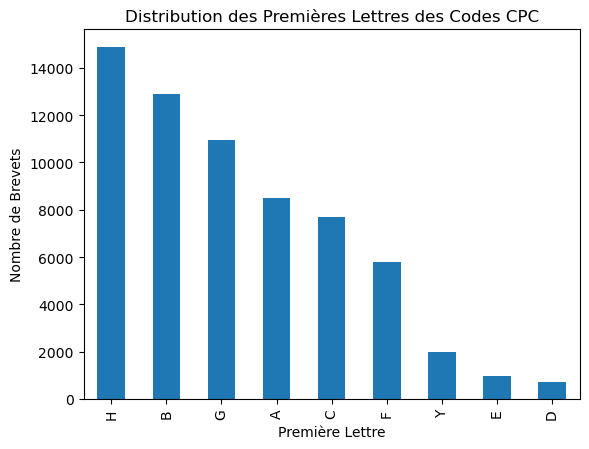

In [9]:
#CPC

#Extraire la première lettre 
print(df_sample['CPC'].head())
print(df_sample['CPC'].apply(type).unique())

def extract_first_letter(cpc_codes):
    #Transformer en liste la chaine de caractère 
    try:
        cpc_codes = eval(cpc_codes)
    except:
        return []

    if isinstance(cpc_codes, list):  # Vérifier que c'est bien une liste
        return [code[0] for code in cpc_codes if isinstance(code, str)]  # Vérifier que chaque élément est une chaîne
    return []

# créa de la colonne 1 letter cpc 
df_sample['CPC_first_letter'] = df_sample['CPC'].apply(extract_first_letter)
print(df_sample['CPC_first_letter'])

cpc_first_letter_counts = df_sample['CPC_first_letter'].explode().value_counts()

# la dist des CPC
cpc_first_letter_counts.plot(kind='bar')
plt.title('Distribution des Premières Lettres des Codes CPC')
plt.xlabel('Première Lettre')
plt.ylabel('Nombre de Brevets')
plt.show()

# Drop Colonne inutile 

In [10]:
#ipc on va essayer de prendre juste les 4premiers caractères des variables de la colonne IPC -> demander aux autres 


#on peut supp les colonnes : claim, description, claim_clean, description_clean, claim_processed, description_processed à confirmer avec harish 
df_sample = df_sample.drop(['claim','description', 'claim_clean', 'IPC'], axis=1)
df_sample.head()

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,claim_processed,CPC_first_letter
26247,18898200,2018-11-12,3736539,2020-11-11,"['B62D6-10', 'G01L5-221', 'B62D15-0215', 'G01L...",epo dp n 42 claim id c en 0001 num 0001 claim ...,"[B, G, B, G, G]"
35067,19190680,2019-08-08,3609084,2020-02-12,"['H04B1-04', 'H04B1-44']",epo dp n 23 claim id c en 0001 num 0001 claim ...,"[H, H]"
34590,20867753,2020-08-18,4033630,2022-07-27,"['H02M1-0064', 'B60L1-006', 'H02P25-22', 'H02P...",epo dp n 69 claim id c en 0001 num 0001 claim ...,"[H, B, H, H, B, B, B, H, H, B, Y, B, B, B]"
16668,19206926,2019-11-04,3817319,2021-05-05,"['H04L69-14', 'Y02D30-50', 'Y02D30-70']",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[H, Y, Y]"
12196,20197989,2020-09-24,3892927,2021-10-13,"['F24F1-0007', 'F24F7-04', 'F24F8-10', 'F24F1-...",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[F, F, F, F, F, F, Y, F]"


## Affichage des 3 premiers caractères du brevet

In [11]:
#est un outil puissant pour l'analyse, la transformation et la manipulation de code source Python. Elle est particulièrement utile pour les tâches qui nécessitent une compréhension approfondie de la structure syntaxique du code.


#on se concentre sur CPC et on se base 2 niveaux donc les 3 premiers caractères du CPC

#comme CPC est de type object donc chaine de caractère il faut qu'on le convertisse en liste pour recup les 3 prem carac
def convert_list(cpc_string):
    try:
        return ast.literal_eval(cpc_string)
    except:
        return []
    
df_sample['CPC'] = df_sample['CPC'].apply(convert_list)

#On extrait les 3 prem carac + supp les doublons 
def extract_three_first_carac(cpc_codes):
    if isinstance(cpc_codes, list):
        cpc_three_car = [code[:3] for code in cpc_codes]
        return list(set(cpc_three_car)) #suppression des doublons 
  
    else:
        return []

df_sample['CPC_three_car'] = df_sample['CPC'].apply(extract_three_first_carac)
print(df_sample[['CPC', 'CPC_three_car']])

                                                     CPC    CPC_three_car
26247  [B62D6-10, G01L5-221, B62D15-0215, G01L3-104, ...       [B62, G01]
35067                               [H04B1-04, H04B1-44]            [H04]
34590  [H02M1-0064, B60L1-006, H02P25-22, H02P27-06, ...  [H02, Y02, B60]
16668                  [H04L69-14, Y02D30-50, Y02D30-70]       [Y02, H04]
12196  [F24F1-0007, F24F7-04, F24F8-10, F24F1-0071, F...       [Y02, F24]
...                                                  ...              ...
49858  [B60H1-00278, B60H1-00342, B60H1-00392, B60H1-...       [Y02, B60]
19849  [A61B34-20, G01B7-004, A61B34-35, A61B34-37, A...       [G01, A61]
46899  [G05F1-468, G05F1-575, G05F3-30, G05F3-267, G0...            [G05]
28256  [C12Y114-13, C12Y113-11, C12Y102-01067, C12P7-...            [C12]
43070  [F16H48-40, B60K17-165, F16H37-0813, F16H48-08...       [F16, B60]

[10000 rows x 2 columns]


## Nettoyage de la colonne claim_processed avant la vectorisation

In [12]:
def clean_text(text):
    text = re.sub(r'epo dp n \d+', '', text)
    # Enlever les chiffres
    text = re.sub(r'\d+', '', text)
    # Enlever les mots redondants définis
    text = re.sub(r'\b(claim text|claim|br|num|id|c en)\b', '', text)
     # Supprimer les espaces en trop
    text = re.sub(r'\s+', ' ', text)  # Remplace tout espace blanc par un seul espace
    text = text.strip()  # Enlève les espaces au début et à la fin
    return text

# Application de la fonction de nettoyage
df_sample['claim_processed_clean'] = df_sample['claim_processed'].apply(clean_text)
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,claim_processed,CPC_first_letter,CPC_three_car,claim_processed_clean
26247,18898200,2018-11-12,3736539,2020-11-11,"[B62D6-10, G01L5-221, B62D15-0215, G01L3-104, ...",epo dp n 42 claim id c en 0001 num 0001 claim ...,"[B, G, B, G, G]","[B62, G01]",sensing device comprising first cover second c...
35067,19190680,2019-08-08,3609084,2020-02-12,"[H04B1-04, H04B1-44]",epo dp n 23 claim id c en 0001 num 0001 claim ...,"[H, H]",[H04],radio frequency device b characterized b compr...
34590,20867753,2020-08-18,4033630,2022-07-27,"[H02M1-0064, B60L1-006, H02P25-22, H02P27-06, ...",epo dp n 69 claim id c en 0001 num 0001 claim ...,"[H, B, H, H, B, B, B, H, H, B, Y, B, B, B]","[H02, Y02, B60]",energy conversion device comprising reversible...
16668,19206926,2019-11-04,3817319,2021-05-05,"[H04L69-14, Y02D30-50, Y02D30-70]",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[H, Y, Y]","[Y02, H04]",method reducing energy consumption mobile devi...
12196,20197989,2020-09-24,3892927,2021-10-13,"[F24F1-0007, F24F7-04, F24F8-10, F24F1-0071, F...",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[F, F, F, F, F, F, Y, F]","[Y02, F24]",air duct device comprising first air duct air ...
...,...,...,...,...,...,...,...,...,...
49858,21150277,2021-01-05,3845402,2021-07-07,"[B60H1-00278, B60H1-00342, B60H1-00392, B60H1-...",epo dp n 13 claim id c en 0001 num 0001 claim ...,"[B, B, B, B, B, B, B, Y, B, B, B]","[Y02, B60]",heat pump device electric vehicle comprising c...
19849,19213798,2019-12-05,3662857,2020-06-10,"[A61B34-20, G01B7-004, A61B34-35, A61B34-37, A...",epo dp n 26 claim id c en 0001 num 0001 claim ...,"[A, G, A, A, A, A, A]","[G01, A61]",system controlling surgical robot robot move e...
46899,20305681,2020-06-22,3929694,2021-12-29,"[G05F1-468, G05F1-575, G05F3-30, G05F3-267, G0...",epo dp n 23 claim id c en 0001 num 0001 claim ...,"[G, G, G, G, G]",[G05],voltage regulator comprising supply terminal c...
28256,21152693,2021-01-21,4032900,2022-07-27,"[C12Y114-13, C12Y113-11, C12Y102-01067, C12P7-...",epo dp n 88 claim id c en 0001 num 0001 claim ...,"[C, C, C, C, C, C, C, C, C, C]",[C12],host cell capable expressing least one functio...


## Import sklearn pour les models

In [13]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
import xgboost as xgb
import numpy as np

# Vectorisation du texte

In [14]:
df_sample.to_csv("test.csv", index=False)

## Méthode Tfidf

In [15]:
texts = df_sample['claim_processed_clean'].fillna('')

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(X.shape)

['_a' '_cys_cam' '_frac_prim' ... 'ωref' 'ωt' 'ϕx']
(10000, 34076)


In [16]:
texts

26247    sensing device comprising first cover second c...
35067    radio frequency device b characterized b compr...
34590    energy conversion device comprising reversible...
16668    method reducing energy consumption mobile devi...
12196    air duct device comprising first air duct air ...
                               ...                        
49858    heat pump device electric vehicle comprising c...
19849    system controlling surgical robot robot move e...
46899    voltage regulator comprising supply terminal c...
28256    host cell capable expressing least one functio...
43070    differential assembly heavy vehicle said diffe...
Name: claim_processed_clean, Length: 10000, dtype: object

## Méthode Word Embedding

In [17]:
data = pd.read_csv("test.csv")
#data = df_sample


print(data.columns)


print(data['CPC_first_letter'].head())


texts = data['claim_processed_clean'].fillna('')


def extract_first_element(x):
    if isinstance(x, str) and x.startswith('[') and x.endswith(']'):
        x = eval(x)
    if isinstance(x, list) and len(x) > 0:
        return x[0]
    else:
        return 'Unknown'

labels = data['CPC_first_letter'].apply(extract_first_element).fillna('Unknown')


unique_labels = labels.unique()
print(f"Unique labels before encoding: {len(unique_labels)}")
print(unique_labels)


sentences = [text.split() for text in texts]


word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


def text_to_vector(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = np.array([text_to_vector(text, word2vec_model) for text in texts])


label_encoder = LabelEncoder()
labels_cleaned = labels[labels.isin(unique_labels)] 
y = label_encoder.fit_transform(labels_cleaned)

encoded_unique_labels = np.unique(y)
print(f"Unique labels after encoding: {len(encoded_unique_labels)}")
print(encoded_unique_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

Index(['Numéro d'application', 'Date d'application', 'Numero de publication',
       'date de publication', 'CPC', 'claim_processed', 'CPC_first_letter',
       'CPC_three_car', 'claim_processed_clean'],
      dtype='object')
0                            ['B', 'G', 'B', 'G', 'G']
1                                           ['H', 'H']
2    ['H', 'B', 'H', 'H', 'B', 'B', 'B', 'H', 'H', ...
3                                      ['H', 'Y', 'Y']
4             ['F', 'F', 'F', 'F', 'F', 'F', 'Y', 'F']
Name: CPC_first_letter, dtype: object
Unique labels before encoding: 8
['B' 'H' 'F' 'A' 'G' 'E' 'C' 'D']
Unique labels after encoding: 8
[0 1 2 3 4 5 6 7]
              precision    recall  f1-score   support

           A       0.53      0.30      0.38       264
           B       0.49      0.58      0.53       316
           C       0.65      0.86      0.74       250
           D       0.00      0.00      0.00        25
           E       0.00      0.00      0.00        39
           F       

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
classifier_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
classifier_xgb.fit(X_train, y_train)
y_pred_xgb = classifier_xgb.predict(X_test)

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=target_names, zero_division=0))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           A       0.55      0.43      0.48       264
           B       0.56      0.59      0.57       316
           C       0.66      0.82      0.73       250
           D       0.17      0.04      0.06        25
           E       0.57      0.10      0.17        39
           F       0.58      0.55      0.56       185
           G       0.62      0.67      0.64       380
           H       0.74      0.75      0.75       541

    accuracy                           0.64      2000
   macro avg       0.55      0.49      0.50      2000
weighted avg       0.63      0.64      0.62      2000



In [19]:
f1_rf = f1_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"F1 Score for RandomForest: {f1_rf}")
print(f"F1 Score for XGBoost: {f1_xgb}")

F1 Score for RandomForest: 0.5903391264157583
F1 Score for XGBoost: 0.624776510887513
